# Perform machine learning on genomic vectors and measurements data using unimodal and early fusion architectures


## Read data

### Measurements

In [1]:
import os
from pathlib import Path

import pandas as pd


dataDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '02_data_matrix', 'balanced_data')
dataDirName.mkdir(exist_ok=True, parents=True)

dataDf = pd.read_csv(Path(dataDirName, 'data.csv'))
dataDf = dataDf.sort_values(by=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime'], ascending=True)
dataDf

,PATIENT_ID,EPISODE_ID,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,Heart rate_mean,...,Phosphate measurement_std,Magnesium measurement_mean,Magnesium measurement_min,Magnesium measurement_max,Magnesium measurement_first,Magnesium measurement_last,Magnesium measurement_std,Organism_FIRST_NOTED,sepsis,target
0,51211,17422049,2023-02-18,54.000000,54.000000,54.0,54.000000,54.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-04-01,0.0,0.0
1,51211,17422049,2023-02-19,54.000000,54.000000,54.0,54.000000,54.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-04-01,0.0,0.0
2,51211,17422049,2023-02-20,54.000000,54.000000,54.0,54.000000,54.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-04-01,0.0,0.0
3,56089,14164983,2020-12-07,55.285714,39.000000,80.0,48.000000,51.000000,16.948100,79.000000,...,0.070711,0.767143,0.766667,0.767619,0.766667,0.767619,0.014142,2020-12-07,0.0,0.0
4,56089,14164983,2020-12-08,58.285714,34.000000,86.0,34.000000,70.000000,20.171880,70.833333,...,0.070711,0.810000,0.810000,0.810000,0.810000,0.810000,0.014142,2020-12-07,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231552,2662222,17201307,2022-12-30,58.647186,53.285714,66.0,59.285714,58.428571,5.213477,120.880000,...,0.234087,0.910000,0.910000,0.910000,0.910000,0.910000,0.108044,2022-12-21,0.0,0.0
231553,2662222,17201307,2022-12-31,58.647186,53.285714,66.0,59.285714,58.428571,5.213477,129.120000,...,0.183848,1.050000,1.010000,1.090000,1.090000,1.010000,0.056569,2022-12-21,0.0,0.0
231554,2662222,17201307,2023-01-01,58.647186,53.285714,66.0,59.285714,58.428571,5.213477,126.000000,...,0.234087,0.900000,0.900000,0.900000,0.900000,0.900000,0.108044,2022-12-21,0.0,0.0
231555,2662222,17201307,2023-01-02,58.647186,53.285714,66.0,59.285714,58.428571,5.213477,64.400000,...,0.234087,3.500000,3.500000,3.500000,3.500000,3.500000,0.108044,2022-12-21,0.0,0.0


### Vectors

In [2]:
import os
from pathlib import Path

import pandas as pd


vectorsDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_vec')
vectorsTestDf = pd.read_csv(Path(vectorsDir, 'gene_test_vectorised.csv'))
vectorsTestDf.drop(columns=['BLOB_TEXT', 'Unnamed: 0'], inplace=True)
vectorsTrainDf = pd.read_csv(Path(vectorsDir, 'gene_train_vectorised.csv'))
vectorsTrainDf.drop(columns=['BLOB_TEXT', 'Unnamed: 0'], inplace=True)
vectorsValDf = pd.read_csv(Path(vectorsDir, 'gene_val_vectorised.csv'))
vectorsValDf.drop(columns=['BLOB_TEXT', 'Unnamed: 0'], inplace=True)
vectorsDf = pd.concat([vectorsTestDf, vectorsTrainDf, vectorsValDf], ignore_index=True)
vectorsDf

,patient_id,tube_id,vector
0,2092580,AH20L008,"[-0.2532142102718353, -0.12319359928369522, -0..."
1,2097130,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0...."
2,2097130,AH20I027,"[-0.39271822571754456, -0.22921983897686005, -..."
3,2110697,AH21C041,"[-0.2880496084690094, -0.16212013363838196, -0..."
4,2111939,AH19A091,"[-0.5479940176010132, -0.35276076197624207, -0..."
...,...,...,...
134,2185888,AH21B064,"[0.37154945731163025, 0.4720954895019531, 0.73..."
135,2191641,AH21A045,"[0.3131726384162903, 0.37569233775138855, 0.60..."
136,2195779,AH21A090,"[0.3441142737865448, 0.4080987870693207, 0.657..."
137,634545,AH21A011,"[0.3386542499065399, 0.45146483182907104, 0.68..."


### Tube ID mapping

In [3]:
import os
from pathlib import Path

import pandas as pd


patientTubeidMappingDf = pd.read_csv(Path(os.environ['GENOMICS_DATA_BASE'], 'patient_tube_id_mapping_full.tsv'), sep='\t')
patientTubeidMappingDf

,tube_code,PATIENT_ID,db_ID,pt_age,pt_gender,EPISODE_ID,hospital_admission,hospital_discharge,hospital_in_last_year,genome_species,species_reported,contig_number,length,tube_code_duplicate_or_old,date_of_collection,ID_number,location_additional_02,collected_from_original
0,AH19J072,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Escherichia coli,Escherichia coli,92,5131021,NaN,2019-10-30,19-303-0997,A-7EA;HAEM,Blood
1,AH19J074,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Streptococcus sp. D19,Streptococcus mitis group,84,2022991,NaN,2019-10-30,19-303-1174,A-7EA;HAEM,Blood Peripheral
2,AH19B003,526238.0,567AE,85,Male,640261.0,2019-02-04,2019-02-07,no,Escherichia coli,Escherichia coli,93,4942915,NaN,2019-02-03,19-034-1596,A-4WB;GMC,Blood
3,AH20A024,788941.0,3YBDS,58,Female,13194824.0,2020-01-16,2020-01-19,no,Escherichia coli,Escherichia coli,110,5149157,NaN,2020-01-16,20-016-2112,S-ED;Emergency,Blood Venous
4,AH20L041,1023735.0,2VJ78,42,Male,14210147.0,2020-12-18,2021-01-05,yes,Staphylococcus aureus,Staphylococcus aureus,46,2735216,NaN,2020-12-16,20-351-2856,Emergency Dept;nan,Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,ALF22L076,639020.0,3S6HL,84,Male,17219899.0,2022-12-15,2022-12-20,yes,Streptococcus vestibularis,Streptococcus salivarius group,107,1938627,NaN,2022-12-15,22-349-2150,Ward 4WB,Blood Peripheral
3113,ALF22L089,655404.0,6EWBM,67,Female,NaN,NaN,NaN,NaN,Proteus columbae,Proteus vulgaris,152,3972219,NaN,2022-12-17,22-351-1465,Comm/Amb Clinic,Blood
3114,ALF22L138,2572048.0,YM5PJ,61,Male,NaN,NaN,NaN,NaN,Enterobacter roggenkampii,Enterobacter cloacae complex,66,4876179,NaN,2022-12-27,22-361-0202,Ward 7 East,Hick White Lum
3115,ALF23A102,2054964.0,5DYAH,35,Female,17294287.0,2023-01-12,2023-02-01,yes,Streptococcus constellatus,Streptococcus anginosus group,54,1869828,NaN,2023-01-11,23-011-3305,ICU,Blood Venous


### Merge all the information

In [4]:
mergedDf = vectorsDf.merge(
    patientTubeidMappingDf[['tube_code', 'date_of_collection']].drop_duplicates(),
    how='inner',
    left_on=['tube_id'],
    right_on=['tube_code'],
).drop(
    columns=['tube_code']
).merge(
    dataDf,
    how='inner',
    left_on=['patient_id'],
    right_on=['PATIENT_ID']
).drop(
    columns=['patient_id']
)
mergedDf

,tube_id,vector,date_of_collection,PATIENT_ID,EPISODE_ID,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,...,Phosphate measurement_std,Magnesium measurement_mean,Magnesium measurement_min,Magnesium measurement_max,Magnesium measurement_first,Magnesium measurement_last,Magnesium measurement_std,Organism_FIRST_NOTED,sepsis,target
0,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-29,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
1,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-30,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
2,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-31,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
3,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-31,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
4,AH20I027,"[-0.39271822571754456, -0.22921983897686005, -...",2020-09-14,2097130,12971391,2019-10-29,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006,AH21B002,"[0.35204654932022095, 0.4347085654735565, 0.68...",2021-02-02,211314,13955099,2021-01-27,70.000,64.0,76.0,73.0,...,0.106066,0.7,0.7,0.7,0.7,0.7,0.074568,2020-10-28,1.0,1.0
7007,AH21B002,"[0.35204654932022095, 0.4347085654735565, 0.68...",2021-02-02,211314,13955099,2021-01-27,70.000,64.0,76.0,73.0,...,0.106066,0.7,0.7,0.7,0.7,0.7,0.074568,2020-10-28,1.0,1.0
7008,AH21A045,"[0.3131726384162903, 0.37569233775138855, 0.60...",2021-01-16,2191641,14094077,2020-11-11,54.625,48.0,70.0,50.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2021-01-16,0.0,0.0
7009,AH21A045,"[0.3131726384162903, 0.37569233775138855, 0.60...",2021-01-16,2191641,14094077,2020-11-12,54.625,48.0,70.0,50.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2021-01-16,0.0,0.0


In [5]:
mergedDf['date_of_collection'] = pd.to_datetime(mergedDf['date_of_collection'], format='%Y-%m-%d')
mergedDf['measurement_datetime'] = pd.to_datetime(mergedDf['measurement_datetime'], format='%Y-%m-%d')
mergedDf['Organism_FIRST_NOTED'] = pd.to_datetime(mergedDf['Organism_FIRST_NOTED'], format='%Y-%m-%d')
mergedDf

,tube_id,vector,date_of_collection,PATIENT_ID,EPISODE_ID,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,...,Phosphate measurement_std,Magnesium measurement_mean,Magnesium measurement_min,Magnesium measurement_max,Magnesium measurement_first,Magnesium measurement_last,Magnesium measurement_std,Organism_FIRST_NOTED,sepsis,target
0,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-29,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
1,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-30,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
2,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-31,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
3,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-31,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
4,AH20I027,"[-0.39271822571754456, -0.22921983897686005, -...",2020-09-14,2097130,12971391,2019-10-29,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006,AH21B002,"[0.35204654932022095, 0.4347085654735565, 0.68...",2021-02-02,211314,13955099,2021-01-27,70.000,64.0,76.0,73.0,...,0.106066,0.7,0.7,0.7,0.7,0.7,0.074568,2020-10-28,1.0,1.0
7007,AH21B002,"[0.35204654932022095, 0.4347085654735565, 0.68...",2021-02-02,211314,13955099,2021-01-27,70.000,64.0,76.0,73.0,...,0.106066,0.7,0.7,0.7,0.7,0.7,0.074568,2020-10-28,1.0,1.0
7008,AH21A045,"[0.3131726384162903, 0.37569233775138855, 0.60...",2021-01-16,2191641,14094077,2020-11-11,54.625,48.0,70.0,50.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2021-01-16,0.0,0.0
7009,AH21A045,"[0.3131726384162903, 0.37569233775138855, 0.60...",2021-01-16,2191641,14094077,2020-11-12,54.625,48.0,70.0,50.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2021-01-16,0.0,0.0


## Perform ML

### Vectors only

#### Prepare data

In [6]:
vectorsOnlyDf = mergedDf.groupby(by=['PATIENT_ID', 'vector']).agg(sepsis_max = pd.NamedAgg(column="sepsis", aggfunc="max")).reset_index()
vectorsOnlyDf

,PATIENT_ID,vector,sepsis_max
0,211314,"[0.35204654932022095, 0.4347085654735565, 0.68...",1.0
1,635723,"[-0.7733622789382935, -0.857825756072998, -1.2...",1.0
2,677694,"[-0.26666897535324097, -0.15388357639312744, -...",1.0
3,2080376,"[-0.7040156722068787, -0.7689500451087952, -1....",1.0
4,2080648,"[-0.724036455154419, -0.7798390984535217, -1.1...",0.0
5,2082838,"[-0.6733225584030151, -0.7025085091590881, -1....",1.0
6,2091319,"[-0.7040837407112122, -0.7633625268936157, -1....",1.0
7,2091697,"[-0.7107170820236206, -0.7737107872962952, -1....",1.0
8,2097130,"[-0.3853421211242676, -0.2268281728029251, -0....",0.0
9,2097130,"[-0.39271822571754456, -0.22921983897686005, -...",0.0


In [7]:
import ast
import numpy as np


X = vectorsOnlyDf['vector']
Y = vectorsOnlyDf['sepsis_max'].apply(lambda x: 1 if x else 0)
X = X.apply(ast.literal_eval)
X=np.vstack(X).astype(np.float32)
Y=np.vstack(Y).astype(np.float32)

In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# X_train, X_test, Y_train, Y_test = X, X, Y, Y

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((32, 300), (9, 300), (32, 1), (9, 1))

In [9]:
import torch
from torch import nn
import torch.utils.data as data


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)

loader = data.DataLoader(data.TensorDataset(X_train_tensor, Y_train_tensor), shuffle=False, batch_size=1024)

In [10]:
print(X_train_tensor.shape, Y_train_tensor.shape, X_test_tensor.shape, Y_test_tensor.shape)

torch.Size([32, 300]) torch.Size([32, 1]) torch.Size([9, 300]) torch.Size([9, 1])


### Define model

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [12]:
class DnnModel(nn.Module):

    def __init__(self):
        super().__init__()

        input_dim = int(X_train_tensor.shape[1])

        self.linear1 = nn.Linear(input_dim, 10)
        self.relu1 = nn.ReLU()

        self.linear2 = nn.Linear(10, 10)
        self.relu2 = nn.ReLU()

        self.linear3 = nn.Linear(10, 1)

    def forward(self, x):

        out = self.linear1(x)
        out = self.relu1(out)

        out = self.linear2(out)
        out = self.relu2(out)

        out = self.linear3(out)

        return out

In [13]:
model = DnnModel().to(device)
model

DnnModel(
  (linear1): Linear(in_features=300, out_features=10, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=10, out_features=1, bias=True)
)

### Set training parameters

In [14]:
learning_rate = 1e-3

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate, weight_decay=1e-3) # 

In [15]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct / len(y_pred) * 100
    return acc

## Distribution of Weights and Biases

### Weights

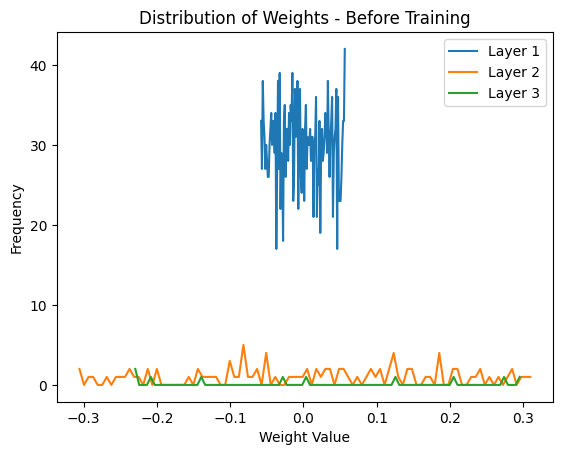

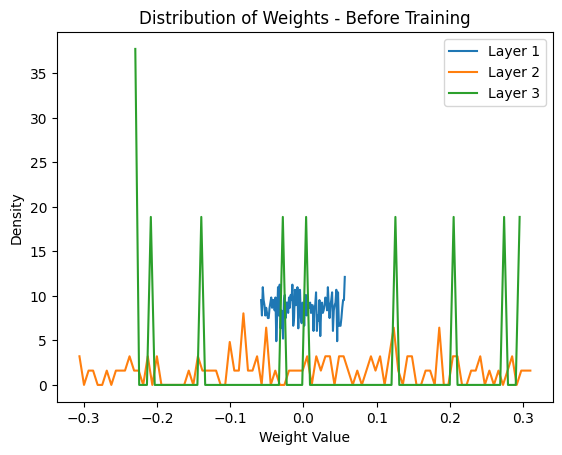

In [16]:
import sys
import os

sys.path.append(os.path.join(os.environ['SEPSIS_PREDICTOR_BASE'], "src"))

import Utils

plotData = {}
plotData['Layer 1'] = model.linear1.weight.data.flatten()
plotData['Layer 2'] = model.linear2.weight.data.flatten()
plotData['Layer 3'] = model.linear3.weight.data.flatten()

plt1 = Utils.plotWeightsDistribution(data=plotData, density=False, dataType="Weights", titlePrefix='Before Training')
plt1.show()

plt2 = Utils.plotWeightsDistribution(data=plotData, density=True, dataType="Weights", titlePrefix='Before Training')
plt2.show()

### Biases

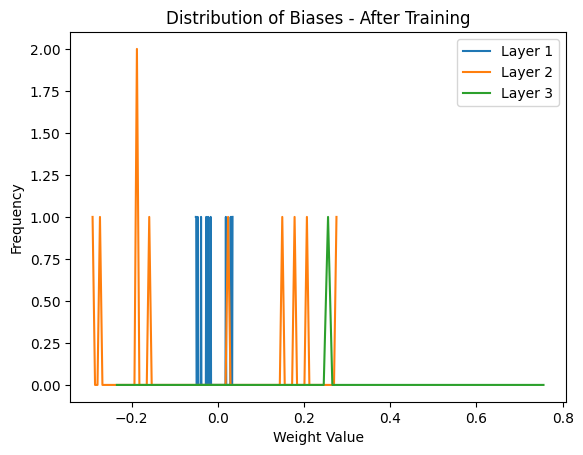

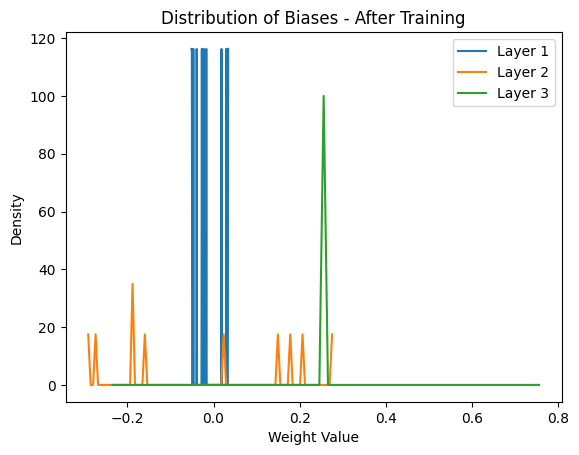

In [ ]:
import sys
import os

sys.path.append(os.path.join(os.environ['SEPSIS_PREDICTOR_BASE'], "src"))

import Utils


plotData = {}
plotData['Layer 1'] = model.linear1.bias.data.flatten()
plotData['Layer 2'] = model.linear2.bias.data.flatten()
plotData['Layer 3'] = model.linear3.bias.data.flatten()

plt1 = Utils.plotWeightsDistribution(data=plotData, density=False, dataType="Biases", titlePrefix='Before Training')
plt1.show()

plt1 = Utils.plotWeightsDistribution(data=plotData, density=True, dataType="Biases", titlePrefix='Before Training')
plt1.show()

## Distribution of activations

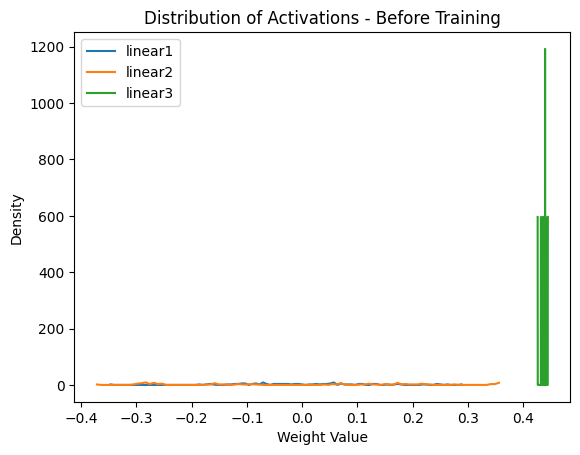

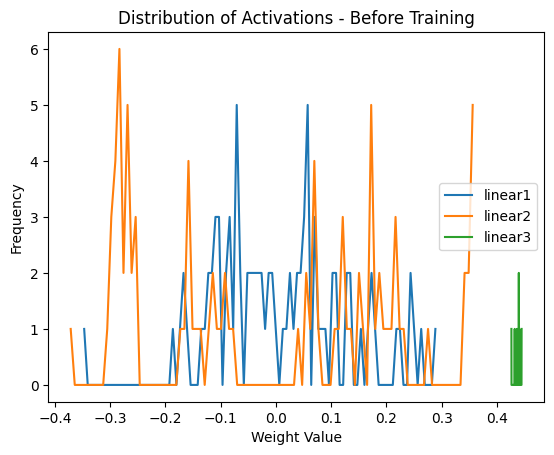

In [18]:
import sys
import os

sys.path.append(os.path.join(os.environ['SEPSIS_PREDICTOR_BASE'], "src"))

import Utils

activation = {}

def get_activation(name):
    def hook(module, input, output):
        activation[name] = output.detach()
    return hook

# Register the hooks
handle1 = model.linear1.register_forward_hook(get_activation('linear1'))
handle2 = model.linear2.register_forward_hook(get_activation('linear2'))
handle3 = model.linear3.register_forward_hook(get_activation('linear3'))

# Perform forward pass to get activations
with torch.no_grad():
    output = model(X_test_tensor)

handle1.remove()
handle2.remove()
handle3.remove()

plt1 = Utils.plotActivationDistribution(activation=activation, density=True, dataType="Activations", titlePrefix='Before Training')
plt1.show()

plt2 = Utils.plotActivationDistribution(activation=activation, density=False, dataType="Activations", titlePrefix='Before Training')
plt2.show()



## Train and evaluate

In [21]:
# Number of epochs
epochs = 400

# Send data to the device
x_train, x_valid = X_train_tensor.to(device), X_test_tensor.to(device)
y_train, y_valid = Y_train_tensor.to(device), Y_test_tensor.to(device)

# Empty loss lists to track values
epoch_count, train_loss_values, valid_loss_values = [], [], []

update_ratios = {}  # stores ratios per layer
prev_params = {}

# Loop through the data
for epoch in range(epochs):

    # Put the model in training mode
    model.train()

    y_logits = model(x_train) # forward pass to get predictions; squeeze the logits into the same shape as the labels
    y_pred = torch.round(torch.relu(y_logits)) # convert logits into prediction probabilities

    loss = loss_fn(y_logits, y_train) # compute the loss   
    acc = accuracy_fn(y_train.int(), y_pred) # calculate the accuracy; convert the labels to integers

    optimizer.zero_grad() # reset the gradients so they don't accumulate each iteration
    loss.backward() # backward pass: backpropagate the prediction loss
    optimizer.step() # gradient descent: adjust the parameters by the gradients collected in the backward pass


    # --- After each epoch: compute ΔW/W ---
    with torch.no_grad():
        for name, param in model.named_parameters():
            if param.requires_grad:
                if name in prev_params:
                    delta = param.data - prev_params[name]
                    ratio = torch.norm(delta) / (torch.norm(param.data) + 1e-12)
                    if name not in update_ratios:
                        update_ratios[name] = [ratio.item()]
                    else:
                        update_ratios[name].append(ratio.item())
                # store current params for next epoch comparison
                prev_params[name] = param.data.clone()


    # Put the model in evaluation mode
    model.eval() 

    with torch.inference_mode():
        valid_logits = model(x_valid)
        valid_pred = torch.round(torch.sigmoid(valid_logits))    

        valid_loss = loss_fn(valid_logits, y_valid)
        valid_acc = accuracy_fn(y_valid.int(), valid_pred)    
    
    # Print progress a total of 20 times
    if epoch % int(epochs / epochs) == 0:
        print(f'Epoch: {epoch:4.0f} | Train Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Validation Loss: {valid_loss:.5f}, Accuracy: {valid_acc:.2f}%')

        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        valid_loss_values.append(valid_loss.detach().numpy())

Epoch:    0 | Train Loss: 0.64908, Accuracy: 34.38% | Validation Loss: 0.59237, Accuracy: 77.78%
Epoch:    1 | Train Loss: 0.64560, Accuracy: 34.38% | Validation Loss: 0.59102, Accuracy: 77.78%
Epoch:    2 | Train Loss: 0.64288, Accuracy: 34.38% | Validation Loss: 0.58891, Accuracy: 77.78%
Epoch:    3 | Train Loss: 0.64069, Accuracy: 37.50% | Validation Loss: 0.58676, Accuracy: 77.78%
Epoch:    4 | Train Loss: 0.63864, Accuracy: 71.88% | Validation Loss: 0.58463, Accuracy: 77.78%
Epoch:    5 | Train Loss: 0.63660, Accuracy: 68.75% | Validation Loss: 0.58251, Accuracy: 77.78%
Epoch:    6 | Train Loss: 0.63459, Accuracy: 68.75% | Validation Loss: 0.58034, Accuracy: 77.78%
Epoch:    7 | Train Loss: 0.63275, Accuracy: 68.75% | Validation Loss: 0.57800, Accuracy: 77.78%
Epoch:    8 | Train Loss: 0.63090, Accuracy: 68.75% | Validation Loss: 0.57555, Accuracy: 77.78%
Epoch:    9 | Train Loss: 0.62920, Accuracy: 68.75% | Validation Loss: 0.57320, Accuracy: 77.78%
Epoch:   10 | Train Loss: 0.62

### Plot training and validation losses

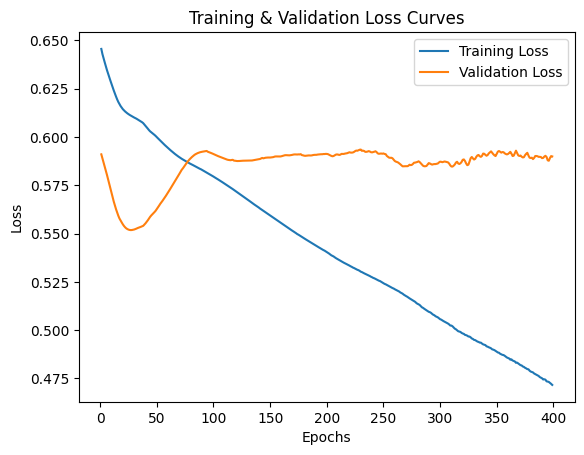

In [22]:
from matplotlib import pyplot as plt


plt.plot(epoch_count[1:], train_loss_values[1:], label='Training Loss')
plt.plot(epoch_count[1:], valid_loss_values[1:], label='Validation Loss')
plt.title('Training & Validation Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

## Distribution of Weights and Biases

### Weights

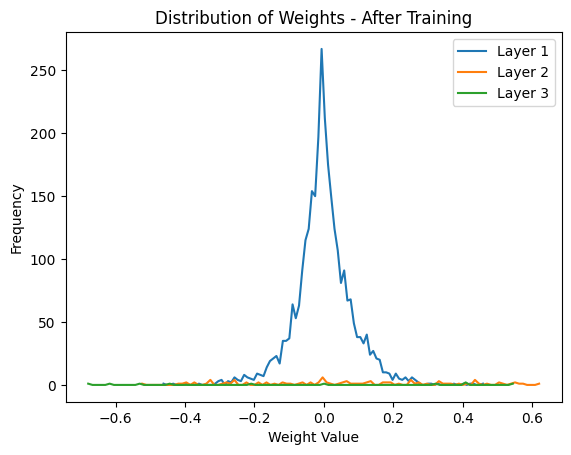

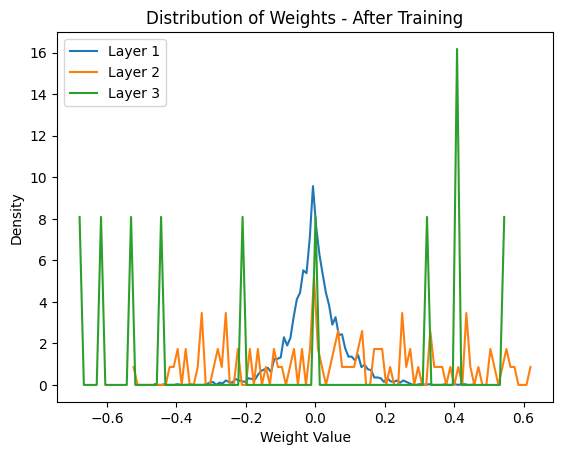

In [23]:
import sys
import os

sys.path.append(os.path.join(os.environ['SEPSIS_PREDICTOR_BASE'], "src"))

import Utils

plotData = {}
plotData['Layer 1'] = model.linear1.weight.data.flatten()
plotData['Layer 2'] = model.linear2.weight.data.flatten()
plotData['Layer 3'] = model.linear3.weight.data.flatten()

plt1 = Utils.plotWeightsDistribution(data=plotData, density=False, dataType="Weights", titlePrefix='After Training')
plt1.show()

plt2 = Utils.plotWeightsDistribution(data=plotData, density=True, dataType="Weights", titlePrefix='After Training')
plt2.show()

### Biases

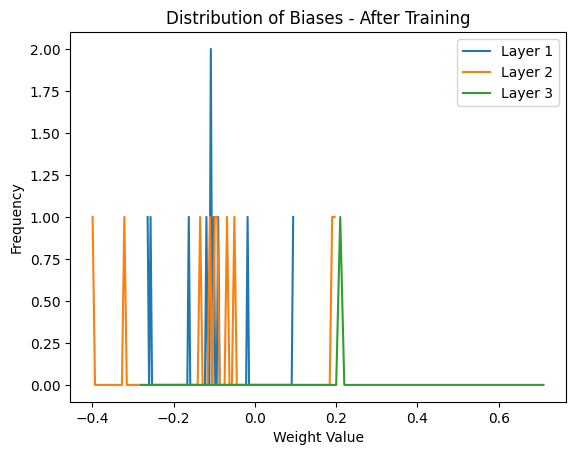

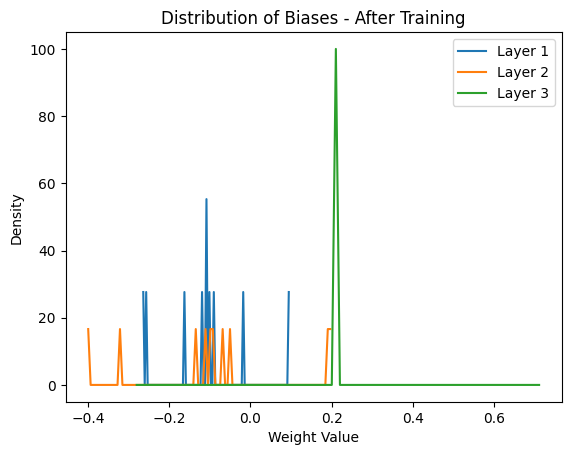

In [24]:
import sys
import os

sys.path.append(os.path.join(os.environ['SEPSIS_PREDICTOR_BASE'], "src"))

import Utils


plotData = {}
plotData['Layer 1'] = model.linear1.bias.data.flatten()
plotData['Layer 2'] = model.linear2.bias.data.flatten()
plotData['Layer 3'] = model.linear3.bias.data.flatten()

plt1 = Utils.plotWeightsDistribution(data=plotData, density=False, dataType="Biases", titlePrefix='After Training')
plt1.show()

plt1 = Utils.plotWeightsDistribution(data=plotData, density=True, dataType="Biases", titlePrefix='After Training')
plt1.show()

## Distribution of Activations

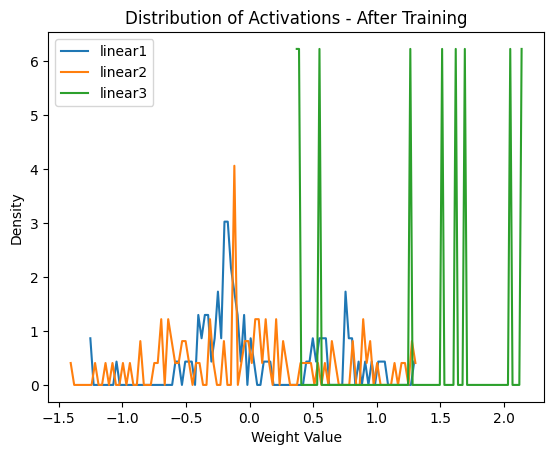

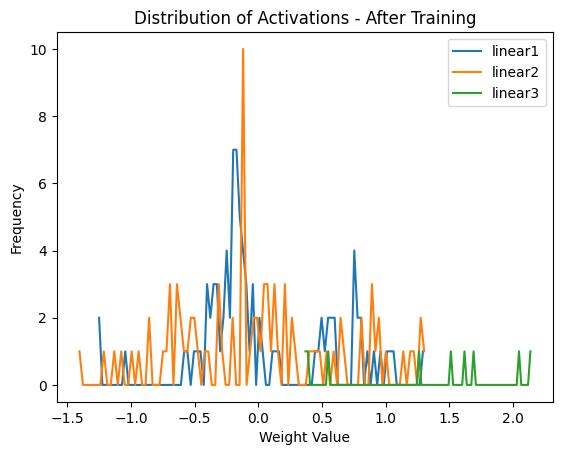

In [25]:
import sys
import os

sys.path.append(os.path.join(os.environ['SEPSIS_PREDICTOR_BASE'], "src"))

import Utils

activation = {}

def get_activation(name):
    def hook(module, input, output):
        activation[name] = output.detach()
    return hook

# Register the hooks
handle1 = model.linear1.register_forward_hook(get_activation('linear1'))
handle2 = model.linear2.register_forward_hook(get_activation('linear2'))
handle3 = model.linear3.register_forward_hook(get_activation('linear3'))

# Perform forward pass to get activations
with torch.no_grad():
    output = model(X_test_tensor)

handle1.remove()
handle2.remove()
handle3.remove()

plt1 = Utils.plotActivationDistribution(activation=activation, density=True, dataType="Activations", titlePrefix='After Training')
plt1.show()

plt2 = Utils.plotActivationDistribution(activation=activation, density=False, dataType="Activations", titlePrefix='After Training')
plt2.show()



## Distribution of Gradients

In [26]:
all_grads = {}
for name, param in model.named_parameters():
    if param.grad is not None:
        if(not name in all_grads):
            all_grads[name] = [param.grad.detach().cpu().numpy().flatten()]
        else:
            all_grads[name].append(param.grad.detach().cpu().numpy().flatten())

/tmp/ipykernel_25434/1630521006.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  'Layer 1': torch.tensor(all_grads['linear1.weight']),


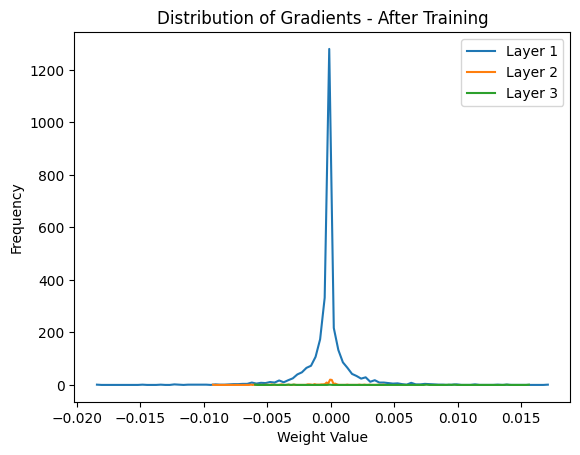

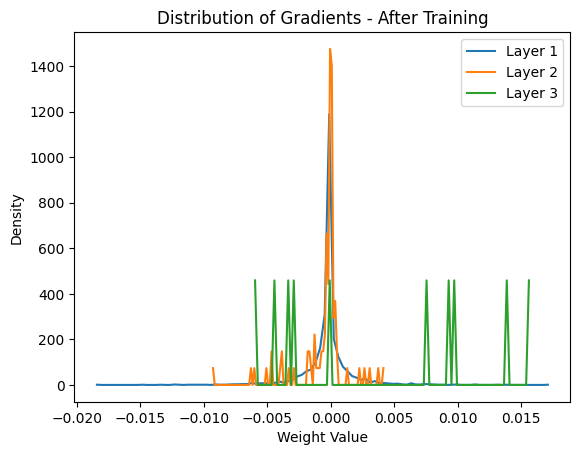

In [27]:
import sys
import os

sys.path.append(os.path.join(os.environ['SEPSIS_PREDICTOR_BASE'], "src"))

import Utils


plotData = {
    'Layer 1': torch.tensor(all_grads['linear1.weight']),
    'Layer 2': torch.tensor(all_grads['linear2.weight']),
    'Layer 3': torch.tensor(all_grads['linear3.weight']),
}

plt1 = Utils.plotWeightsDistribution(data=plotData, density=False, dataType="Gradients", titlePrefix='After Training')
plt1.show()

plt2 = Utils.plotWeightsDistribution(data=plotData, density=True, dataType="Gradients", titlePrefix='After Training')
plt2.show()


## Plotting weight update ratio (ΔW/W)

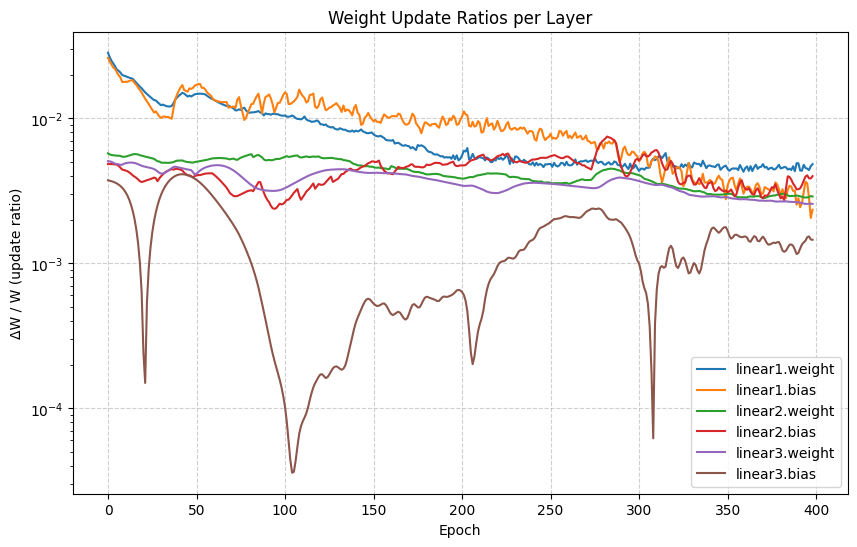

In [ ]:
plt.figure(figsize=(10, 6))
for name, ratios in update_ratios.items():
    plt.plot(ratios, label=name)

plt.xlabel("Epoch")
plt.ylabel("ΔW / W (update ratio)")
plt.title("Weight Update Ratios per Layer")
plt.yscale("log")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
